# Lab One: Exploring Table Data
### Authored by: Armin Charkhkar, Venkat Vellanki, Leland Winston

## Business Understanding:
### Purpose of Data
This dataset is an aggreate of songs and their features from spotify's developer API. This dataset was originally used to analyze characteristics of songs that could be used to predict their genres.

Some of the variables in this dataset are generated by algorithms that spotify has made using other metrics they have generated to try and quantify an element of a song (ex. insturmentalness, liveness, valance, energy, etc.). While these features can be insightful, the algorithms that spotify uses to create them might not be accurate. As such, any conclusions drawn from these features should be interpreted with caution.

In our analysis the primary objective will be to identify metrics that predict a songs popularity within it's own genre. This could be valuable for various third parties, especially those who are deploying resources to generate music that could be used in music production. Our insights might contribute to their understanding of what drives engagement from listeners.

### Accuracy of Potential Model
Given that there are existing models for music generation, our algorithm would need to outperform these in terms of generating music that gains actual listener traction.



In [ ]:
# loading the music dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

# Dataset is from https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre?resource=download
df = pd.read_csv('music_genre.csv')

df.head()

Pandas: 1.5.3
Numpy: 1.23.5


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


## Understanding the Data
- Artist name: object (nominal)
- Track Name: object (nominal)
- Popularity: int (ordinal) ***Self-explanatory***
- Acousticness: float (ratio) ***Confidence measure of acoustic or not***
- Danceability: float (ratio) ***Based on combination of other elements***
- Duration_ms: float (interval) ***Time, measured in milliseconds***
- Energy: float (ratio) ***Perceptual measure of intensity and activity***
- Instrumentalness: float (ratio) ***Whether a track contains no vocals***
- Key: one hot encoding (nominal) ***Integer mapped to songs dominant musical scale***
- Liveness: float (ratio) ***Presence of an audience in the recording***
- Loudness: float (interval) ***Overall loudness of a track in decibels***
- Mode: one hot encoding (nominal) (binary) ***Indicates major or minor scale***
- Speechiness: float (ratio) ***Detects the presence of spoken words in a track***
- Tempo: float (interval) ***Estimated tempo of a track in BPM***
- Valence: float (ratio) ***Sentiment of the song (pos. or neg.)***
- Music_genre: one hot encoding (nominal) ***Genre the song belongs to***


In [ ]:
# Data types of the attributes
print(df.dtypes)
print('============')
print(df.info())

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float

### Cleaning the Data

In [ ]:
import seaborn as sns
print('Seaborn', sns.__version__)

Seaborn 0.12.2


In [ ]:
# Identifying duplicate rows within the dataset
df.duplicated().any()
duplicated = df.duplicated()
df[duplicated]
df.shape

(50005, 18)

In [ ]:
# Verifying the duplicate rows before deletion
df.iloc[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


In [ ]:
#deleting duplicate rows
df.drop([10000,10001, 10002, 10003, 10004], inplace=True)

In [ ]:
#verifying that the rows were deleted
df.shape

(50000, 18)

In [ ]:
#Empty tempo values were filled with '?' instead of NaN
list2 = ['?']
df[df['tempo'].isin(list2)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


In [ ]:
#Seeing the counts of missing tempos by genre
no_tempo = df[df['tempo'].isin(list2)]
no_tempo['music_genre'].value_counts()

Electronic     534
Blues          530
Country        514
Alternative    505
Anime          503
Classical      500
Rap            496
Hip-Hop        480
Jazz           479
Rock           439
Name: music_genre, dtype: int64

In [ ]:
#dropping the missing tempo values because the missing values do not affect any one genre drastically more than another.
#Spotify probably had problems determining the tempo of these songs and decided to represent this with a '?'
filtered = df.drop(df[df['tempo'] == '?'].index)
filtered.shape



(45020, 18)

In [ ]:
#Determining empty_field values for artist names
#Spotify probably just missed these values when collecting and storing the data
list1 = ['empty_field']
len(df[df['artist_name'].isin(list1)])

2489

In [ ]:
#of unique artist
len(filtered['artist_name'].unique())

6603

In [ ]:
filtered = filtered[filtered['duration_ms'] >= 30000]
filtered = filtered[filtered['duration_ms'] >= 30000]
filtered['duration_ms'] = filtered['duration_ms'] / 1000
filtered.rename(columns={'duration_ms': 'duration_s'}, inplace=True)
filtered.shape
#not considering "songs" less that 30 seconds "songs"

(40549, 18)

In [ ]:
# Removing attributes that aren't useful right now
for col in ['instance_id', 'artist_name','obtained_date']:
    if col in filtered:
        del filtered[col]

filtered.shape
#We decided to drop instance_id, obtained_date, and artist_name because they will not serve us in our exploration
#We retained about 80% of the original dataset

(40549, 15)

## Data Visiulaization


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

print('Matplotlib:', matplotlib. __version__)

Matplotlib: 3.7.1


Text(0.5, 1.0, 'Violin Plot of Popularity vs Genre')

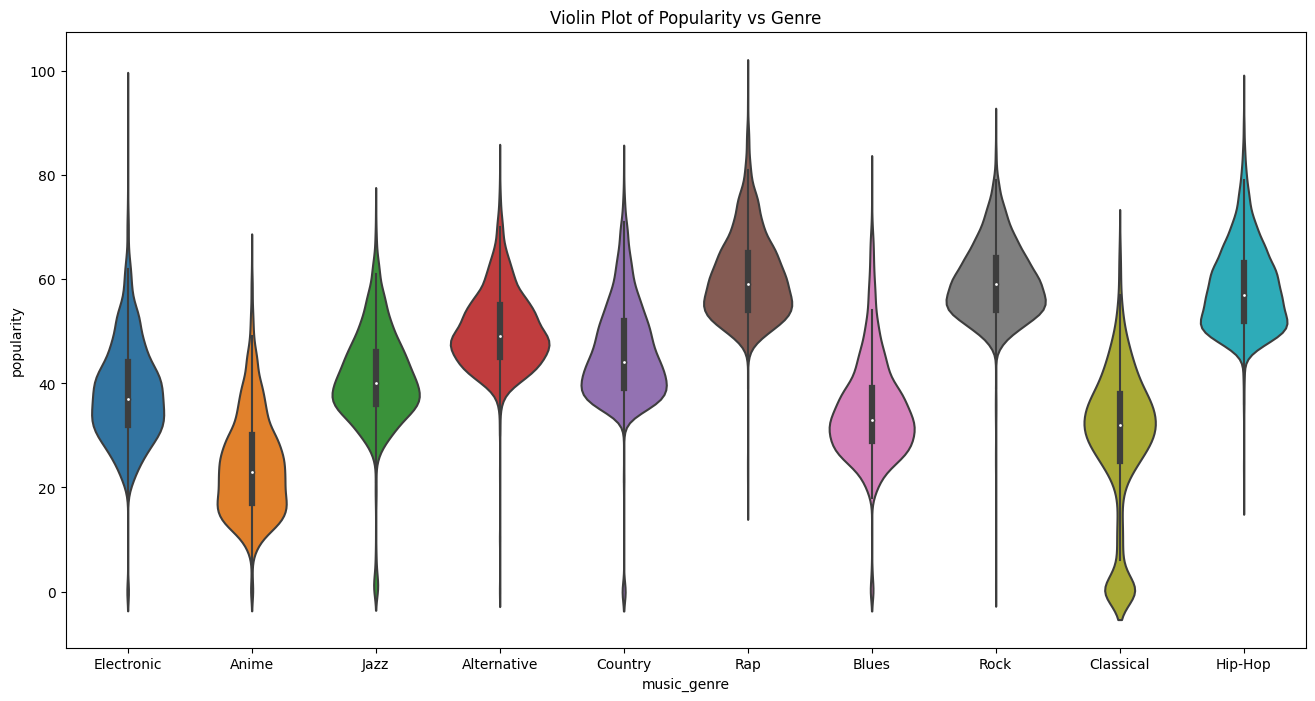

In [ ]:
plt.subplots(figsize=(16, 8))
sns.violinplot(x="music_genre", y="popularity", data=filtered)
plt.title('Violin Plot of Popularity vs Genre')

The violin plot above highlights the relative popularity for songs, seperated. by genre. Through this plot, we are able to identify how genres compare with one another, when considering the distribution of popular songs. This plot allows customers, namely record labels, to understand which genres have a higher/lower presence of popular music. Additionally, labels are able to note which genres of music are more likely to contain popular songs. Looking at the anime genre, we observe that they have the lowest average popularity. With Classical music, the region of highest density is smaller in comparison to other genres, as well as having the largest density of low-popularity music.

Text(0.5, 1.0, 'Popularity Histogram, 100 bins')

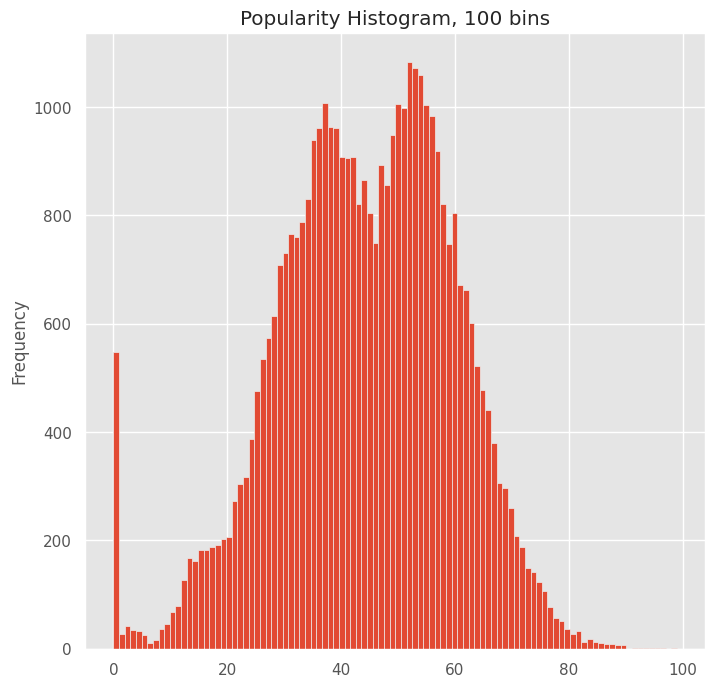

In [ ]:
plt.style.use('ggplot')

plt.subplots(figsize=(8,8))
filtered.popularity.plot.hist(bins=100)
plt.title('Popularity Histogram, 100 bins')

This histogram shows that there is a multimodal distrubution of popularity over all of the songs in the dataset. We can also see that most songs are either right at below middle of the popularity scores. There is also an outstanding number of songs that rank have a very low popularity score.

<ipython-input-33-0e360bd89781>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered[vars_to_use].corr(), cmap=cmap, annot=True)


<Axes: >

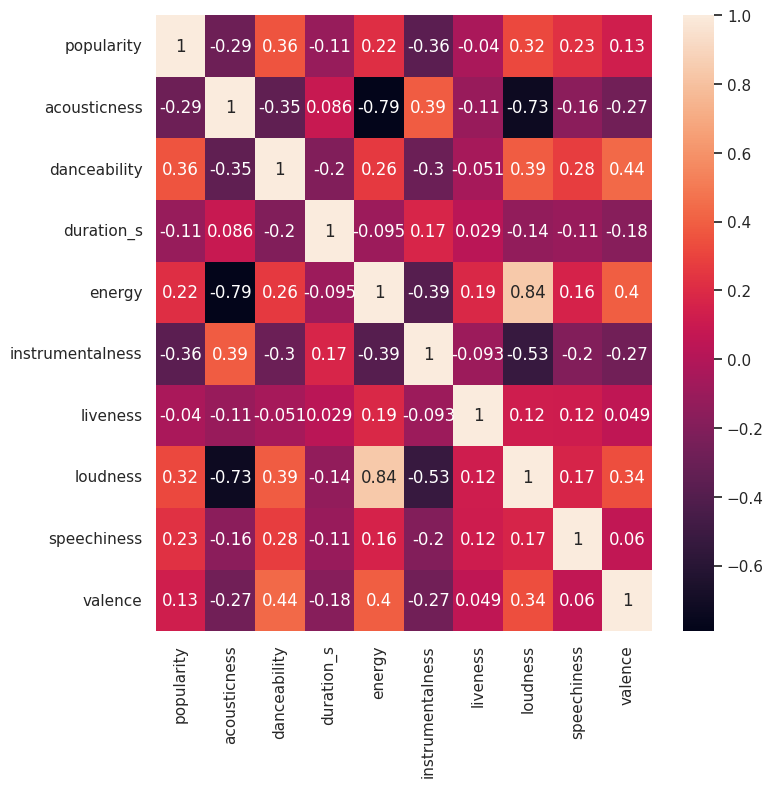

In [ ]:
vars_to_use = ['popularity', 'acousticness', 'danceability', 'duration_s', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] # pick vars

# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated
cmap = sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(filtered[vars_to_use].corr(), cmap=cmap, annot=True)


The Heat Map above gives a genral sense of how the elements spotify has quantified correlate to each other. This heat map gives us a better understanding of how these varaibles relate to one another. This visualization allows record labels to observe which song attributes best compliment each other. For instance, danceability has a high correlation (0.44) to valence. On the other hand, music producers can note which attributes do not compliment each other, such as acoutsicness and energy (-0.79).

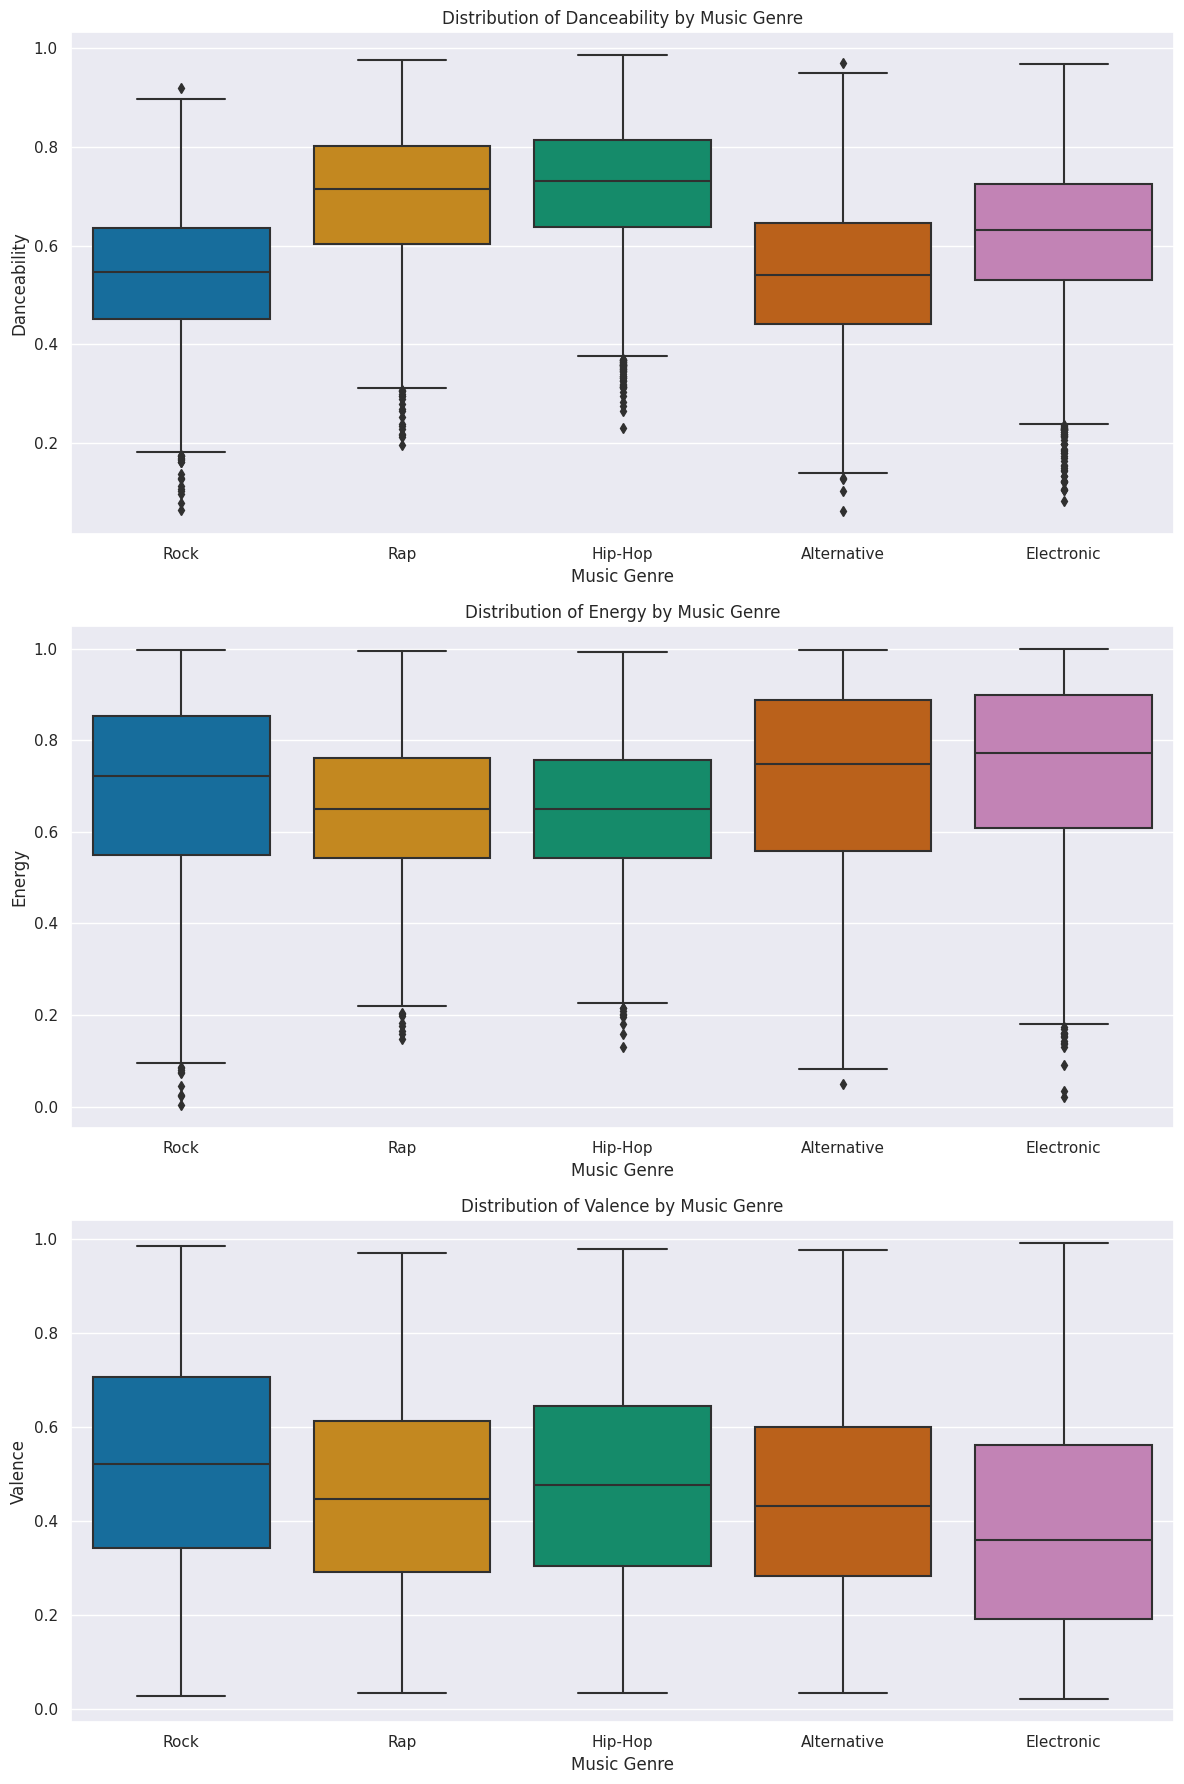

In [ ]:
top5_filtered = filtered[filtered['music_genre'].isin(['Rock', 'Rap','Hip-Hop','Alternative','Electronic'])]

sns.set_palette("colorblind")

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.4)

# List of features to plot
features_to_plot = ['danceability', 'energy', 'valence']

# Loop through the features and create box plots
for i, feature in enumerate(features_to_plot):
    sns.boxplot(data=top5_filtered, x="music_genre", y=feature, order=['Rock', 'Rap', 'Hip-Hop', 'Alternative', 'Electronic'], ax=axes[i])
    axes[i].set_xlabel("Music Genre")
    axes[i].set_ylabel(feature.capitalize())
    axes[i].set_title(f"Distribution of {feature.capitalize()} by Music Genre")

# Show the plots
plt.tight_layout()
plt.show()

The plot above shows the distribution of different characteristics of songs across the top 5 music genres: rap, rock, hip hop, electronic, and alternative. The median values for each characteristic are shown as a horizontal line.

Danceability:
- The median danceability value for rock and alternative is 0.5.
- The median danceability value for rap and hip hop is 0.7.
- The median danceability value for electronic is 0.65.

Energy:
- The median energy value for rock, alternative, and electronic is 0.75.
- The median energy value for rap and hip hop is 0.65.

Valence:
- The median valence value for rap and alternative is 0.45.
- The median valence value for rock and hip hop is 0.55.
- The median valence value for electronic is 0.4.

From this graph, we can see that danceability’s values have less variance across the top 5 genres, which means that many of the songs in these genres share a similar level of danceability. This could be because these genres are often associated with dancing. Whereas, for the distribution of valence, we can see that there is more variance across genres, but the median value is more consistent than the median value for danceability. This could be because different genres are associated with different emotions, such as rock with anger and sadness, and electronic with happiness and excitement. The distribution of energy also shares a relatively consistent median value even though there is more variance for the value across genres. This could be because these genres are often associated with high-energy activities, such as partying and dancing.


<Axes: xlabel='count', ylabel='key'>

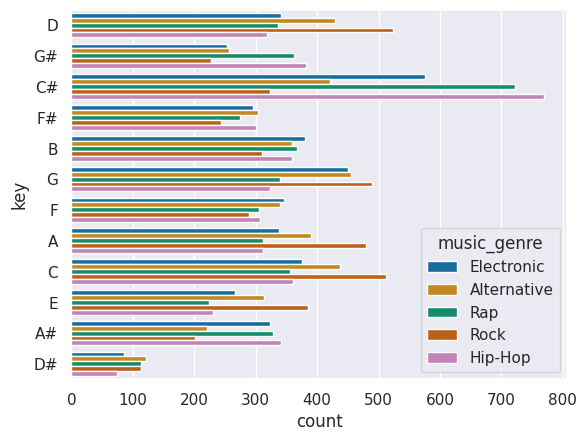

In [ ]:
sns.set_palette("colorblind")
sns.countplot(data=top5_filtered, y="key", hue="music_genre")

This graph shows how frequently a key is used within the top 5 genres. We can see which keys are favorites of all genres and which keys some genres favor more than others.

In [ ]:
# Dataframe holding values for top 5 genres of music
rap_df = filtered[filtered['music_genre'] == 'Rap']
electronic_df = filtered[filtered['music_genre'] == 'Electronic']
rock_df = filtered[filtered['music_genre'] == 'Rock']
hiphop_df = filtered[filtered['music_genre'] == 'Hip-Hop']
alt_df = filtered[filtered['music_genre'] == 'Alternative']

alt_df.head()

,track_name,popularity,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
15005,Love You to Death,48.0,0.35900,0.423,428.800,0.738,0.084000,F#,0.0801,-7.329,Major,0.0319,111.414,0.276,Alternative
15006,Puppets,46.0,0.29900,0.733,221.787,0.444,0.000003,E,0.1040,-7.170,Major,0.1150,89.10600000000001,0.372,Alternative
15007,Never Let You Down,43.0,0.29700,0.666,262.560,0.740,0.000000,G,0.1450,-5.908,Minor,0.0375,124.911,0.620,Alternative
15008,Honey Whiskey,49.0,0.02360,0.561,191.947,0.764,0.000014,C#,0.2090,-5.175,Major,0.0422,90.00399999999999,0.657,Alternative
15009,Where You Are,43.0,0.00972,0.652,226.333,0.813,0.000041,F#,0.2900,-4.737,Major,0.0410,124.0,0.560,Alternative


## Questions we want to ask:
- Of the top 5 most popular genres what are the characteristics that most strongly correlate with popularity for a song within the top 5 genres?
- What is the correlation between duration and popularity across the top 5 genres?
- How do extreme values of valence correlate to popularity for songs within the top 5 genres?

<ipython-input-26-89b69fb160e8>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(genre_df[vars_to_use].corr(), cmap=cmap, annot=True, ax=axes[i])
<ipython-input-26-89b69fb160e8>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(genre_df[vars_to_use].corr(), cmap=cmap, annot=True, ax=axes[i])
<ipython-input-26-89b69fb160e8>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(genre_df[vars_to_use].corr(), cmap=cmap, annot=True, ax=axes[i])
<ipy

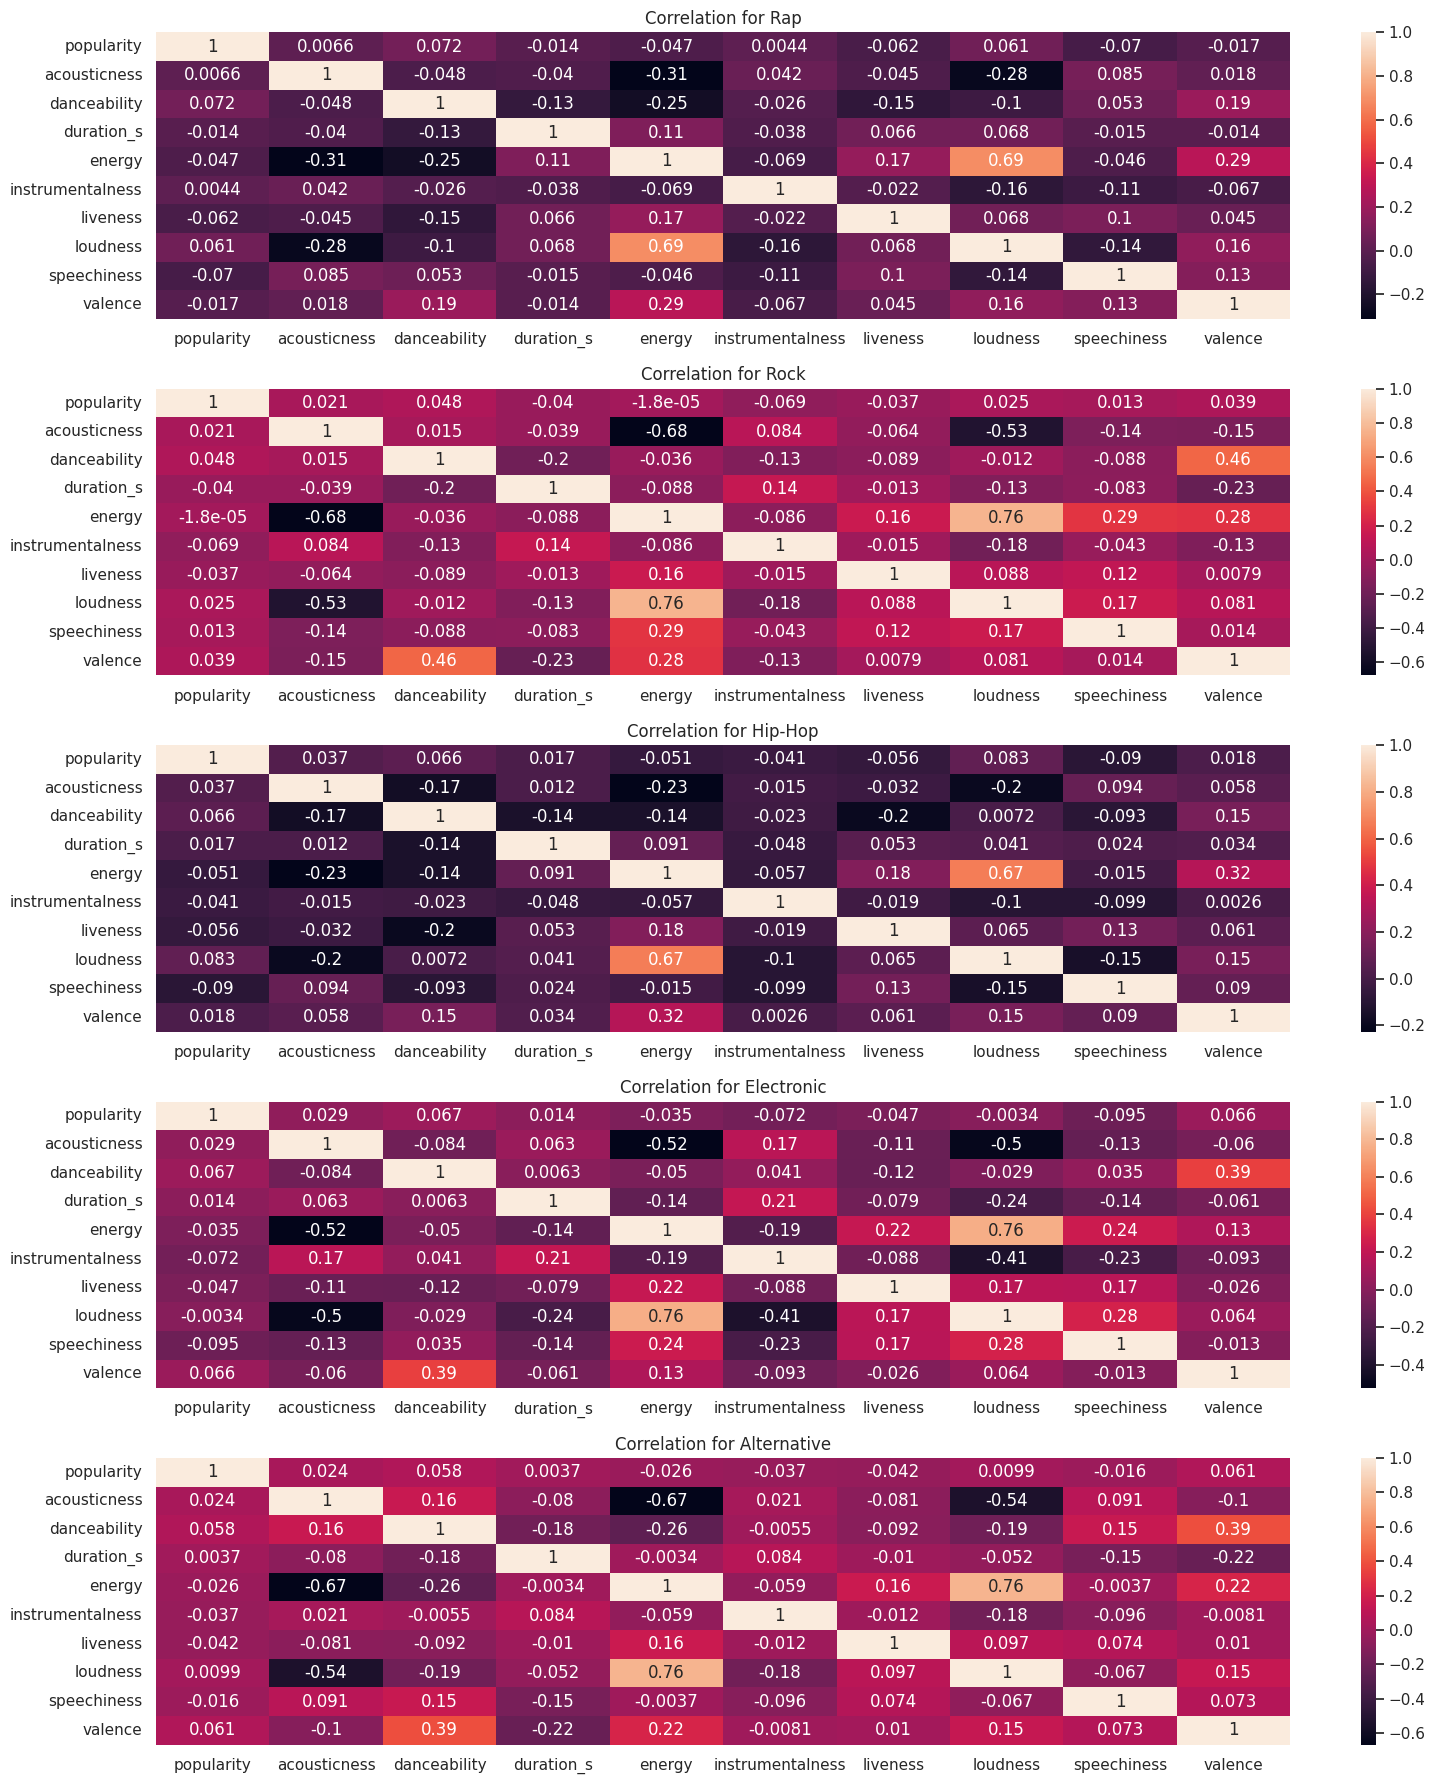

In [ ]:
vars_to_use = ['popularity', 'acousticness', 'danceability', 'duration_s', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] # pick vars

# List of genre dataframes
genre_dataframes = [rap_df, rock_df, hiphop_df, electronic_df, alt_df]

# Create subplots for 3 rows and 2 columns
fig, axes = plt.subplots(5, 1, figsize=(16, 18))
axes = axes.flatten()

# Plot heatmaps for each genre
for i, genre_df in enumerate(genre_dataframes):
    sns.heatmap(genre_df[vars_to_use].corr(), cmap=cmap, annot=True, ax=axes[i])
    axes[i].set_title(f'Correlation for {genre_df["music_genre"].iloc[0]}')

plt.tight_layout()
plt.show()

The diagram above displays a heat map for each of the top 5 genres and identifies how attributes correlate within said genre. These relations could be used by music producers when seeking to understand what features drive popularity within their genre.

- Rap: Danceability and loudness are the two elements that have the highest positive correlation with popularity. Energy, liveness, and speechiness have some of the strongest inverse correlations with popularity.

- Rock: Danceability, acousticness, and valence have the strongest correlation with popularity. Duration, instrumentalness, and liveness have the strongest inverse correlations popularity.

- Hip-Hop: Acousticness, danceability, and loudness have the strongest positive correlation with popularity. Energy, instrumentalness, and liveness are the features that have the strongest negative correlation with popularity.

- Electronic: Danceability, acousticness, and valence are the features that have the strongest positive correlation with popularity. Speechiness, liveness, and instrumentalness have the strongest negative correlation with popularity.

- Alternative: Loudness, danceability, and valence have the strongest positive correlation with popularity. Liveness, instrumentalness, and energy have the strongest negative correlation with popularity.

There are some intersting insights given by the heatmaps for the top 5 genres that were not visible by viewing the trends on the heatmap for the entire dataset. A significant similarity between the heatmaps is the strong relationship between danceability and popularity. Loudness is also an element that is highly correlated with popularity in all heatmaps. The most notable insight was with the relationship between acousticness and popularity. It appears that acousticness could be a good metric for predicting popularity in cerain genres (Hip-Hop and Electronic) but not in all genres. The significance of valence as a predictor in certain genres is also something that could have been overlooked in the heatmap for the genral dataset.

This will give third parties a sense of how to weigh the importance of each attribute in models they may use to genreate music.

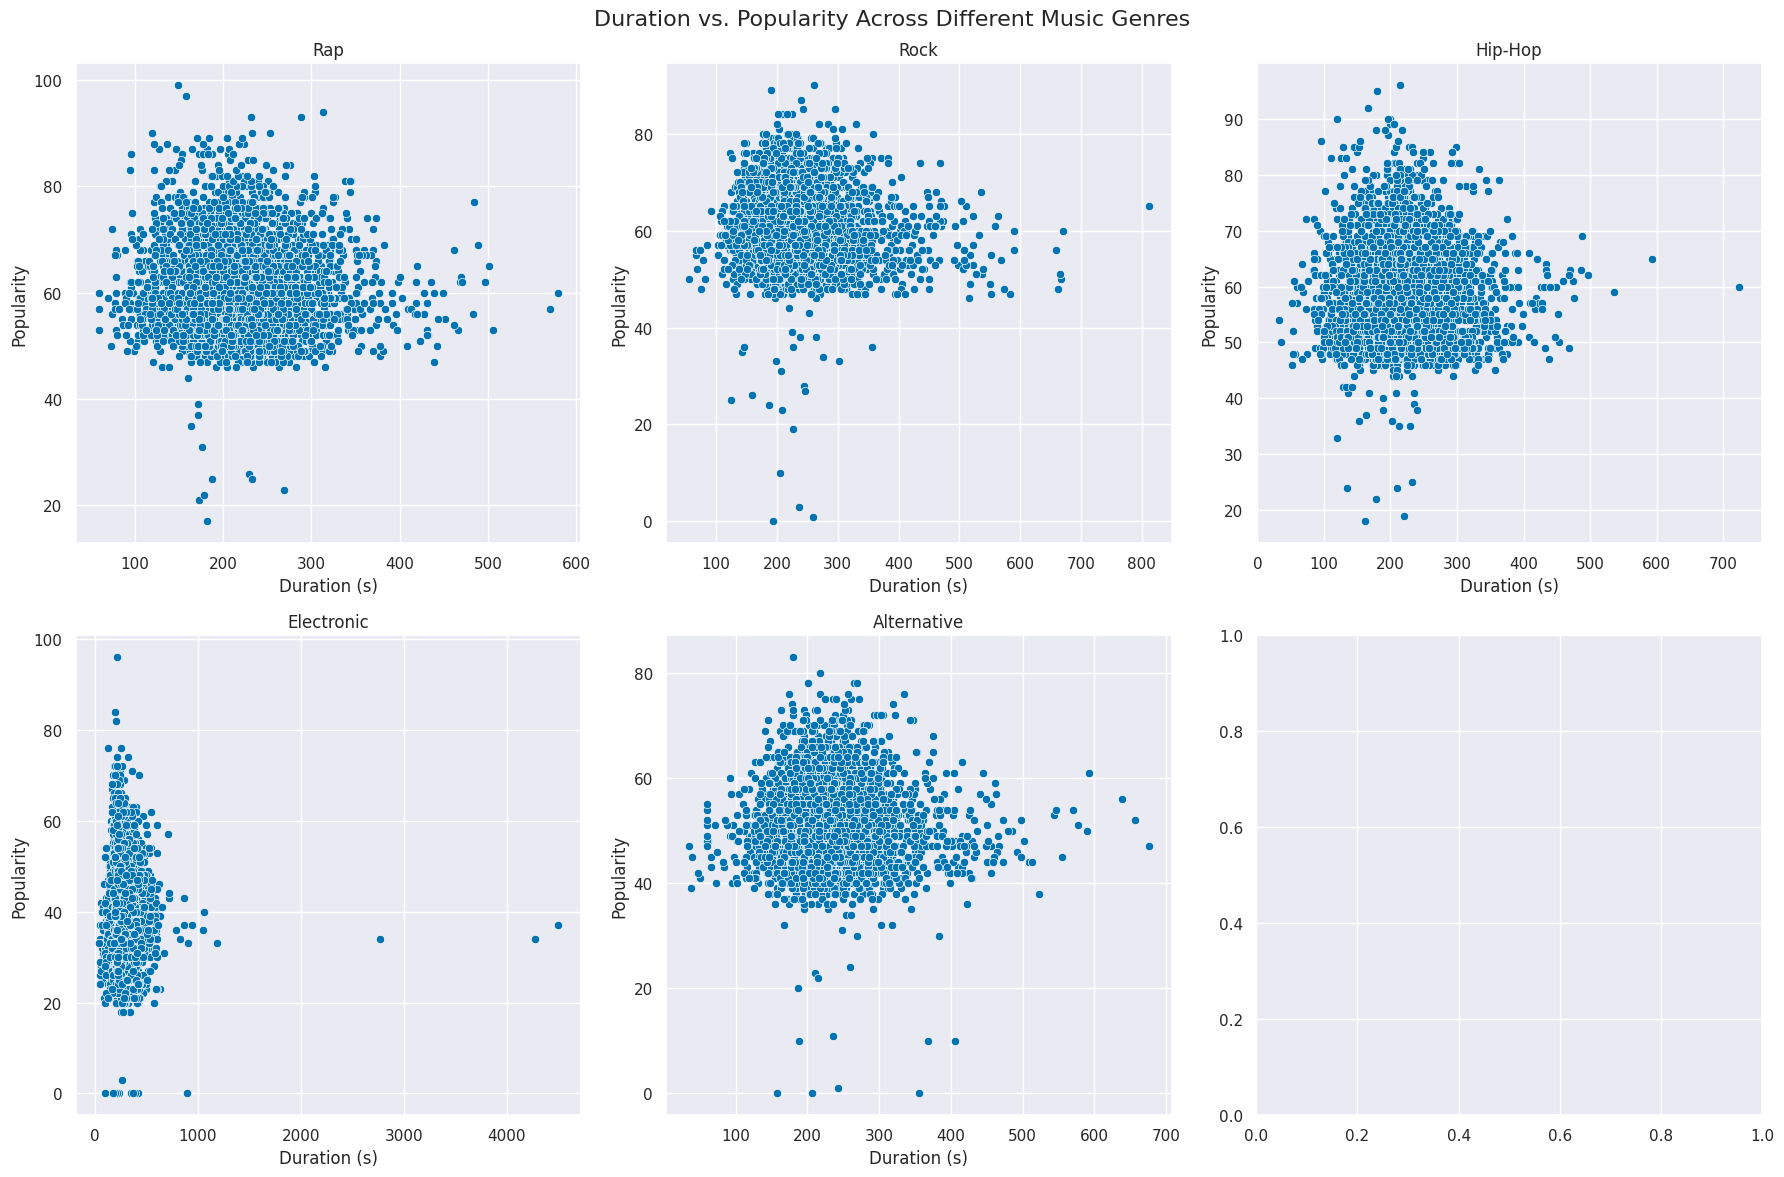

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each genre and plot duration vs. popularity
for i, genre_df in enumerate(genre_dataframes):
    sns.scatterplot(data=genre_df, x='duration_s', y='popularity', ax=axes[i])
    axes[i].set_title(f'{genre_df["music_genre"].iloc[0]}')
    axes[i].set_xlabel('Duration (s)')
    axes[i].set_ylabel('Popularity')

fig.suptitle('Duration vs. Popularity Across Different Music Genres', fontsize=16)

plt.tight_layout()
plt.show()


The scatter plots above identify the correlation between popularity and the duration of a song within a given genre. The graphs allow for music roducers to better identify the time length a song needs to be, if they want to have a higher likelihood of popularity. A notable pattern amongst most of the genres is that a majority of popular songs fall under 5 minutes (300 Seconds). The Electronic graph is scaled higher, due to the average length of songs being greater, and it shows how shorter songs within the genre have a higher popularity. On the other hand, the other 4 genres appear to have a specific range where popularity is the highest.

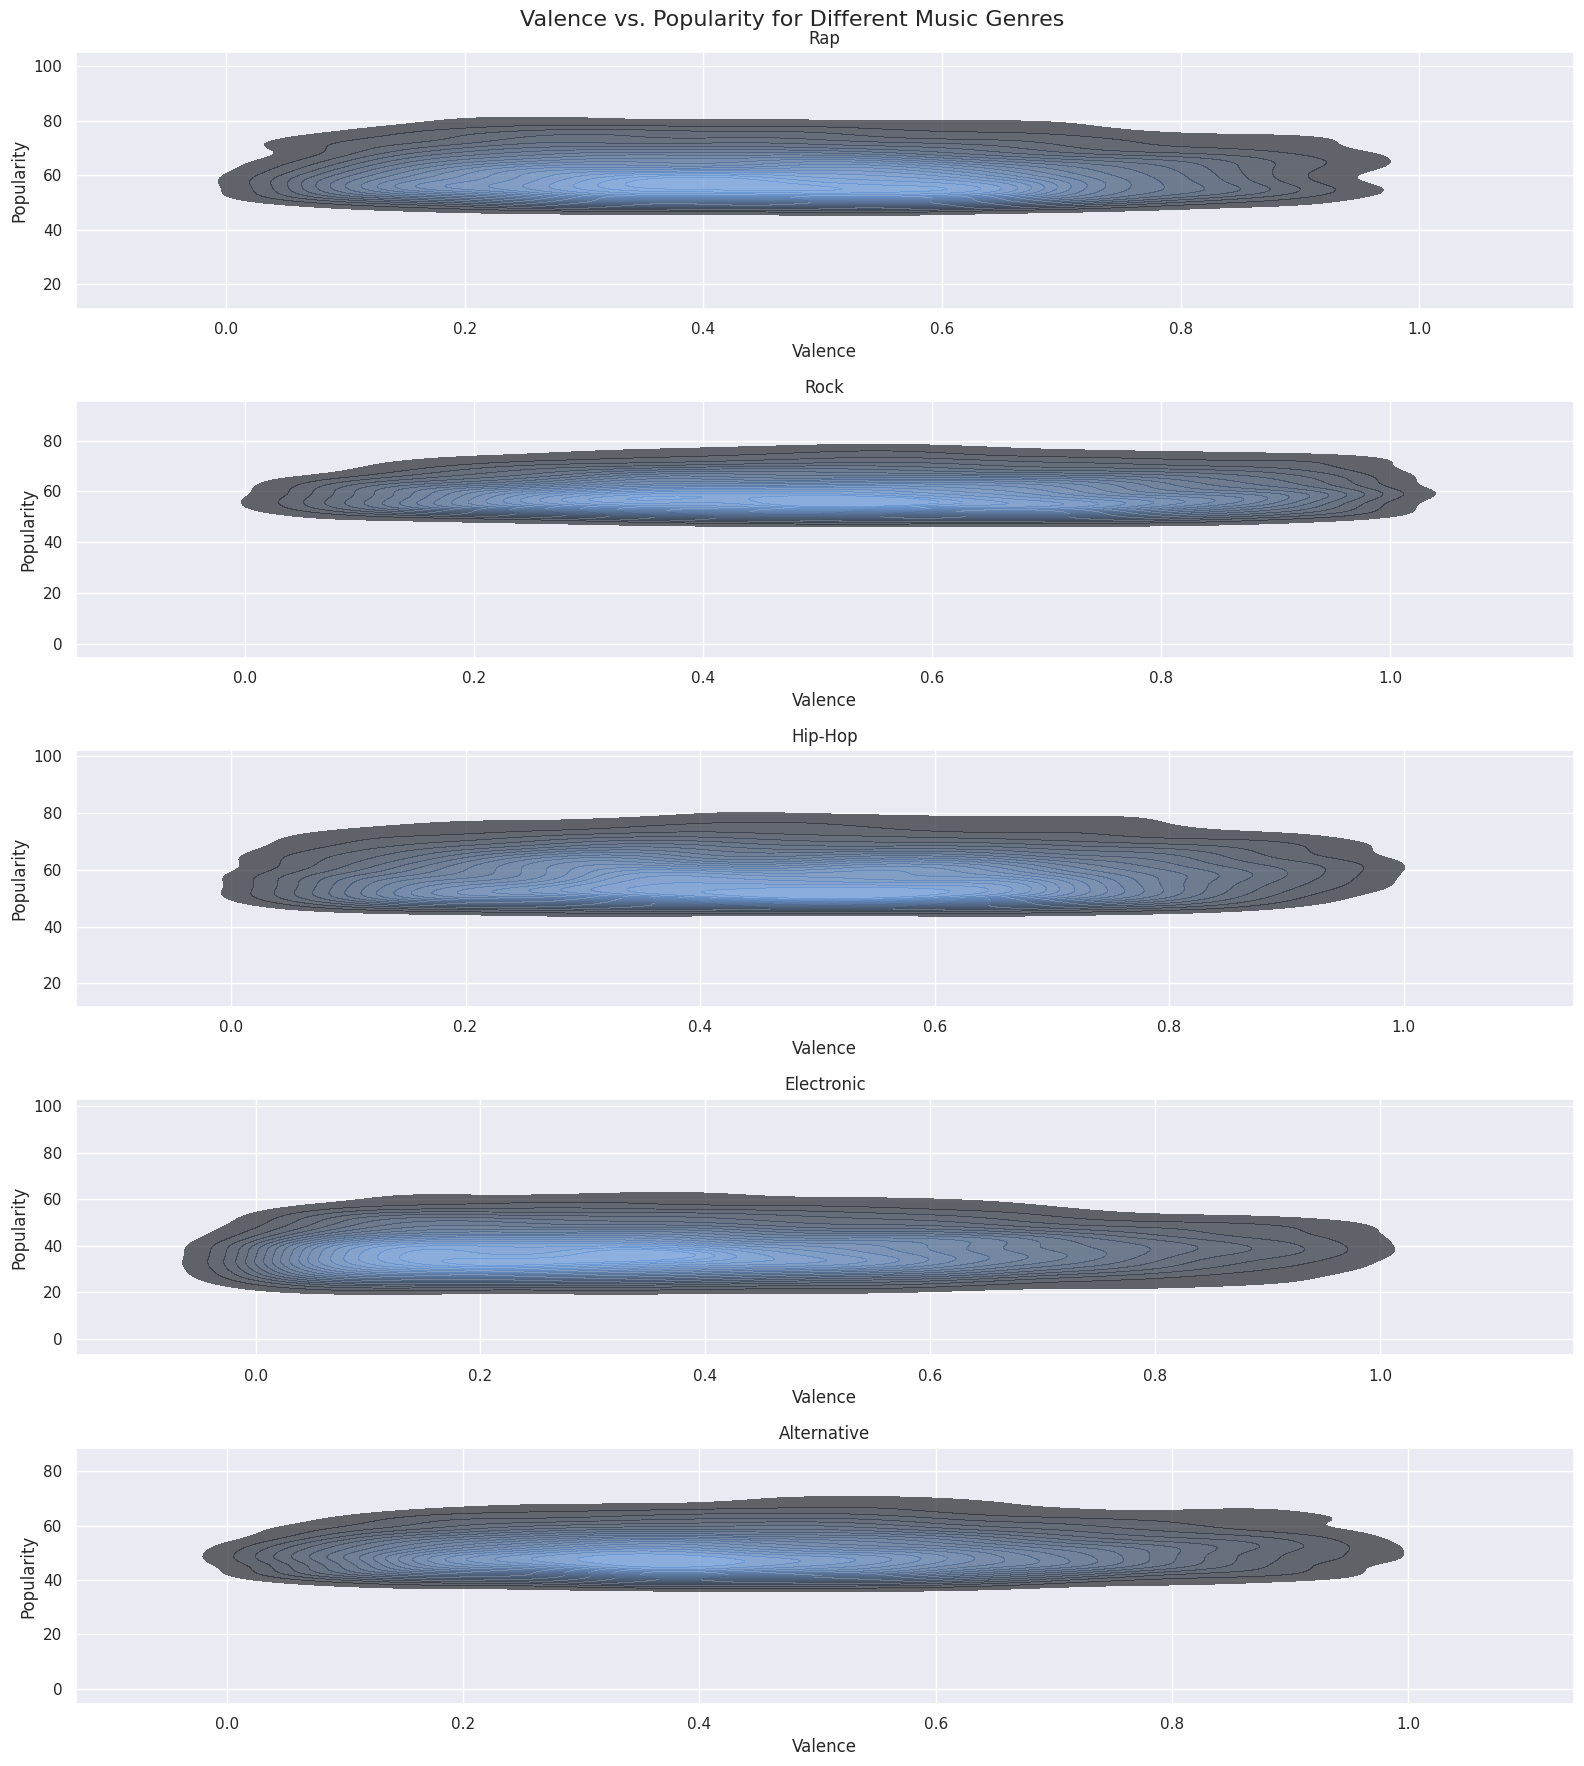

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(16, 18))
axes = axes.flatten()

custom_palette = sns.dark_palette("#69d", reverse=False, as_cmap=True)
# Loop through each genre and plot valence vs. popularity
for i, genre_df in enumerate(genre_dataframes):
    # Calculate the density of points
    density = sns.kdeplot(data=genre_df, x='valence', y='popularity', ax=axes[i], cmap=custom_palette, fill=True, levels=20, alpha=0.7)
    axes[i].set_title(f'{genre_df["music_genre"].iloc[0]}')
    axes[i].set_xlabel('Valence')
    axes[i].set_ylabel('Popularity')

fig.suptitle('Valence vs. Popularity for Different Music Genres', fontsize=16)

plt.tight_layout()
plt.show()

The graphs above plot the popularity versus valence for each of the top 5 most popular music genres. The higher density of the valence values for each plot are highlighted by the lighter blue color and the less dense values are highlighted by the darker color. A music producer might find value in understanding how valence, whether the song has a more positive or negative sentiment, will affect the popularity of their song. If we look at each subplot and the genre, we can try to infer some information.

Rap:
- The most dense valence values are in the range of 0.2 to 0.6.
- The popularity scores for the most dense areas are in the range of 45 to 70.

Rock:
- The most dense valence values are in the range of 0.2 to 0.8.
- The popularity scores are grouped tightly together in the range of 45 to 80, with the most dense values appearing between 45 to 60.

Hip-Hop:
- The valence and popularity values are very similar to rap.
- The most dense valence values are in the range of 0.2 to 0.6.
- The popularity scores are in the range of 45 to 70.

Electronic:
- The most dense valence values are in the range of 0.0 to 0.6.
- The popularity scores for the most dense areas are in the range of 20 to 45.

Alternative:
- The most dense valence values are in the range of 0.3 to 0.5.
- The popularity scores for the most dense areas are in the range of 40 to 50.


From the graphs we can see that rap and hip-hop have valence values distributed across the range, with no major effect on popularity scores. Whereas, electronic and rock have higher concentrations of valence values that correspond to popularity scores. It also appears that extreme values of valence do not correspond to higher popularity scores. Music producers interested in creating electronic or rock music might have to take more notice of the positive or negative sentiment of their song than someone producing rap, hip-hop, or alternative music.


##Exceptional Work
We are interested in identifying the relation between specific features like popularity and 'valence' of songs and the key they are written in, as well as if the key is a 'major' or 'minor' key. This would help music producers pick which key their songs should be written in, so they can maximize the song's popularity.

Text(0.5, 1.0, 'Violin Plot of Popularity vs Key')

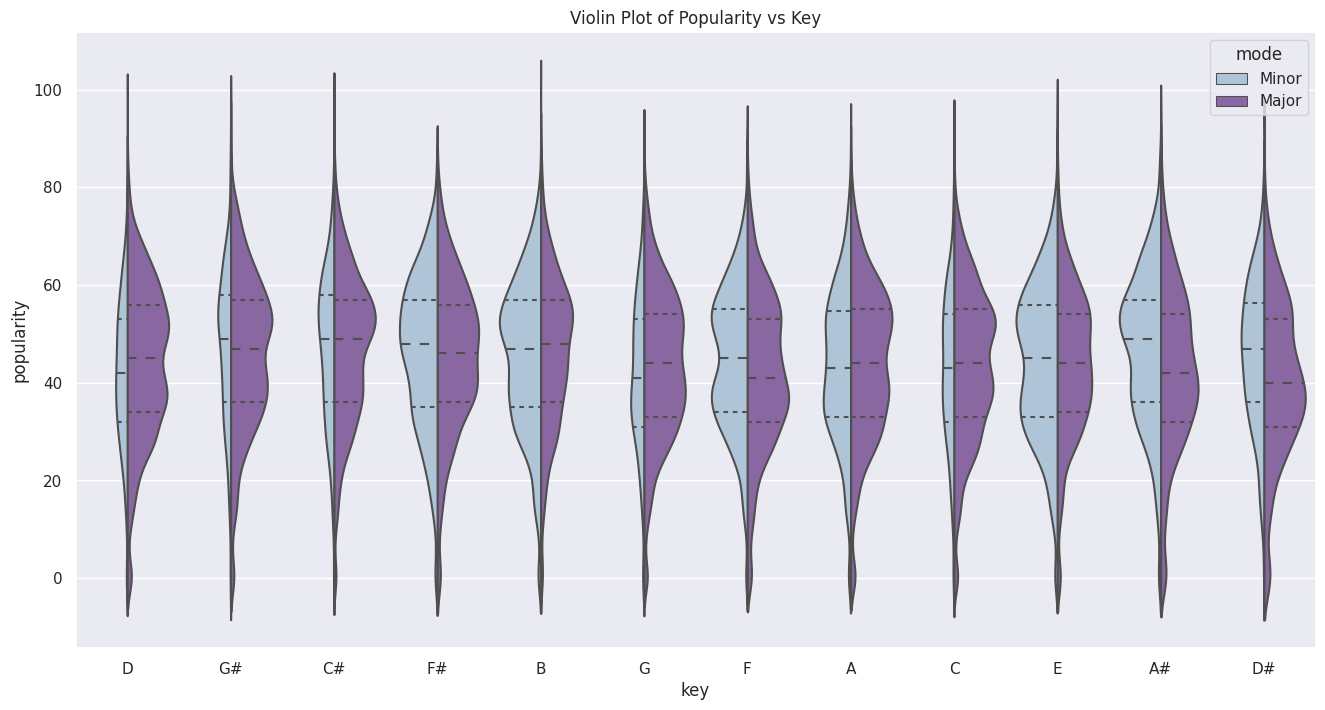

In [ ]:
plt.subplots(figsize=(16, 8))
sns.violinplot(x="key", y="popularity", hue="mode", split=True, inner="quart", scale="count", data=filtered, palette="BuPu")
plt.title('Violin Plot of Popularity vs Key')

The Violin Plot illustrates the relationship between the popularity of a song and the key it's written in, while also considering the mode. Furthermore, we can observe that 7 out of the 12 keys have a higher rate of popular songs written in the minor mode. However, it is important to note that the density of the violin plots can attribute to affecting how the respective IQR's are weighted. Another observation to note is how minor mode songs have a higher rate of popularity, yet there are more songs in the database written in the major mode.